### Load the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

### Let's take a quick look at the Data

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   R_fighter     4240 non-null   object 
 1   B_fighter     4240 non-null   object 
 2   R_odds        4240 non-null   float64
 3   B_odds        4240 non-null   float64
 4   date          4240 non-null   object 
 5   location      4240 non-null   object 
 6   country       4240 non-null   object 
 7   Winner        4240 non-null   object 
 8   title_bout    4240 non-null   object 
 9   weight_class  4240 non-null   object 
 10  gender        4240 non-null   object 
dtypes: float64(2), object(9)
memory usage: 475.2+ KB


### Let's convert 'date' to datetime

In [4]:
df['date'] = pd.to_datetime(df['date'])

### Let's remove any blank data

In [5]:
df = df.dropna()

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   R_fighter     4240 non-null   object        
 1   B_fighter     4240 non-null   object        
 2   R_odds        4240 non-null   float64       
 3   B_odds        4240 non-null   float64       
 4   date          4240 non-null   datetime64[ns]
 5   location      4240 non-null   object        
 6   country       4240 non-null   object        
 7   Winner        4240 non-null   object        
 8   title_bout    4240 non-null   object        
 9   weight_class  4240 non-null   object        
 10  gender        4240 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 397.5+ KB


### Let's take a peek at all of the features

In [7]:
df[['R_fighter', 'B_fighter']].describe()

,R_fighter,B_fighter
count,4240,4240
unique,1217,1400
top,Donald Cerrone,Charles Oliveira
freq,23,18


#### We can see that Donal Cerrone and Charles Oliveira have fought in a lot of fights, but we won't be sure of how many until we can combine both columns in some way since fighters can appear in both columns
***

In [8]:
df['date'].describe()

count                    4240
unique                    362
top       2016-11-19 00:00:00
freq                       25
first     2010-03-21 00:00:00
last      2020-03-14 00:00:00
Name: date, dtype: object

#### From the date column we can see that the first fight we are looking at occurred on March 21st, 2010.  The most recent fight occurred on March 14, 2020.  So we are looking at fights over a ten year period
***

In [9]:
df[['R_odds', 'B_odds']].describe()

,R_odds,B_odds
count,4240.000000,4240.000000
mean,-118.092217,68.525708
std,272.796068,252.371462
min,-1700.000000,-1200.000000
25%,-256.250000,-145.000000
50%,-150.000000,130.000000
75%,130.000000,225.000000
max,775.000000,1300.000000


#### From the odds column we can see the largest favorite was -1700.  The largest underdog was +1300
***

In [10]:
df['location'].describe()

count                       4240
unique                       144
top       Las Vegas, Nevada, USA
freq                         764
Name: location, dtype: object

#### Las Vegas has had the most fights, although fights have taken place in 144 different locations
***

In [11]:
print(df['country'].describe())
print()
print(df['country'].unique())

count     4240
unique      27
top        USA
freq      2491
Name: country, dtype: object

['Brazil' 'USA' ' USA' ' New Zealand' ' Canada' ' Uruguay' ' China'
 ' United Arab Emirates' ' Mexico' ' Denmark' ' Australia' ' Singapore'
 ' Russia' ' Brazil' ' South Korea' ' Sweden' ' United Kingdom'
 ' Czech Republic' ' Argentina' ' Germany' ' Chile' ' Poland' ' Japan'
 ' Netherlands' ' Croatia' ' Ireland' ' Philippines']


#### Fights have taken place in 27 different countries.  Over half of them have occurred in the USA.

In [12]:
print(df['Winner'].describe())
print()
print(df['Winner'].unique())

count     4240
unique       3
top        Red
freq      2430
Name: Winner, dtype: object

['Blue' 'Red' 'Draw']


#### Red has won 2430 / 4240 fights.  The three values of 'Winner' are 'Red', 'Blue', or 'Draw'
***

In [13]:
print(df['title_bout'].describe())

count      4240
unique        2
top       False
freq       4026
Name: title_bout, dtype: object


#### 4026 out of 4240 fights have NOT been title fights
***

In [14]:
print(df['weight_class'].describe())
print()
print(df['weight_class'].unique())

count            4240
unique             13
top       Lightweight
freq              786
Name: weight_class, dtype: object

['Lightweight' 'Welterweight' 'Light Heavyweight' 'Flyweight'
 "Women's Strawweight" 'Bantamweight' "Women's Flyweight"
 "Women's Bantamweight" 'Middleweight' 'Featherweight'
 "Women's Featherweight" 'Heavyweight' 'Catch Weight']


#### There are 13 weight classes covering the men and women's divisions.  'Lightweight' has had the most fights
***

In [15]:
print(df['gender'].describe())

count     4240
unique       2
top       MALE
freq      3854
Name: gender, dtype: object


#### 3854 of the 4240 fights have been in the male divisions
***

### Fights by Year

#### We know the first year is 2010, and the most recent year is 2020

In [16]:
year_labels = []
for z in range(2010, 2021):
    year_labels.append(z)
    
fight_counts = []
for z in (year_labels):
    fight_counts.append(len(df[df['date'].dt.year==z]))
    
    
    

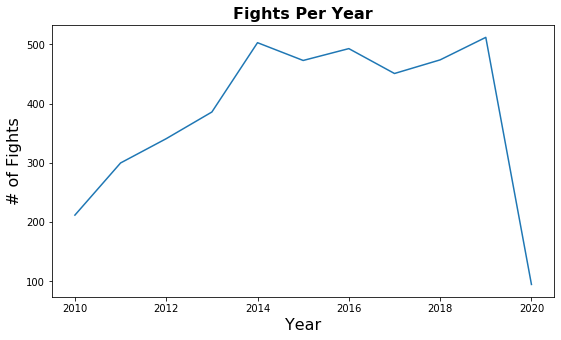

In [17]:
plt.figure(figsize=(9,5))
plt.plot(year_labels, fight_counts)
plt.xlabel('Year', fontsize=16)
plt.ylabel('# of Fights', fontsize=16)
plt.title('Fights Per Year', fontweight='bold', fontsize=16)
plt.show()

#### Since about 2014 there have been around 400 to 500 fights per year.
***

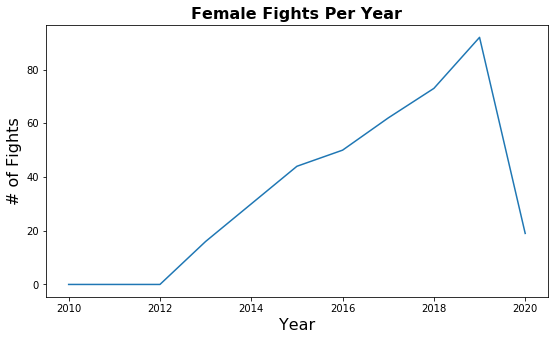

In [18]:
female_fight_counts = []
for z in (year_labels):
    female_fight_counts.append(len(df[(df['date'].dt.year==z) & (df['gender']=='FEMALE')])) 
#print(female_fight_counts)

plt.figure(figsize=(9,5))
plt.plot(year_labels, female_fight_counts)
plt.xlabel('Year', fontsize=16)
plt.ylabel('# of Fights', fontsize=16)
plt.title('Female Fights Per Year', fontweight='bold', fontsize=16)
plt.show()

#### The first female fight occurred in 2013 and the number of female fights has consistently risen year-by-year
***

### Let's add an underdog column to the original dataframe.  This will be helpful going forward

In [19]:
df['underdog'] = ''

red_underdog_mask = df['R_odds'] > df['B_odds']
#print(red_underdog_mask)
#print()

blue_underdog_mask = df['B_odds'] > df['R_odds']
#print(blue_underdog_mask)
#print()

even_mask = df['B_odds'] == df['R_odds']
#print(even_mask)
#print()

df['underdog'][red_underdog_mask] = 'Red'
df['underdog'][blue_underdog_mask] = 'Blue'
df['underdog'][even_mask] = 'Even'




D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### How common are upsets?

Let's explore how common upsets are.  First let's remove fights where the fighters are even from the dataframe.  We will also remove fights that end in a draw.  This should not be a very large number.

In [20]:
df_no_even = df[df['underdog'] != 'Even']
df_no_even = df_no_even[df_no_even['Winner'] != 'Draw']
print(f"Number of fights including even fights and draws: {len(df)}")
print(f"Number of fights with even fights and draws removed: {len(df_no_even)}")

Number of fights including even fights and draws: 4240
Number of fights with even fights and draws removed: 4088


In [21]:
number_of_fights = len(df_no_even)
number_of_upsets = len(df_no_even[df_no_even['Winner'] == df_no_even['underdog']])
number_of_favorites = len(df_no_even[df_no_even['Winner'] != df_no_even['underdog']])
#print(number_of_upsets)
#print(number_of_fights)
#print(number_of_favorites)

In [22]:
upset_percent = (number_of_upsets / number_of_fights) * 100
favorite_percent = (number_of_favorites / number_of_fights) * 100
#print(upset_percent)
#print(favorite_percent)

([<matplotlib.patches.Wedge at 0x16939f2bd48>,
 [Text(-0.5157387396972825, 0.9716035983751083, 'Favorites'),
  Text(0.5157389216334618, -0.9716035018011998, 'Underdogs')],
 [Text(-0.28131203983488134, 0.5299655991136953, '65.5%'),
  Text(0.2813121390727973, -0.529965546437018, '34.5%')])

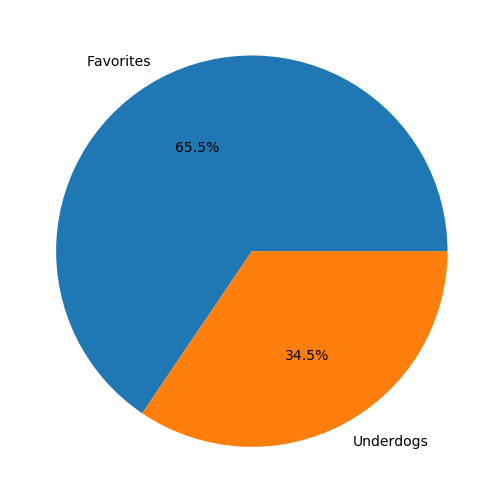

In [23]:
labels = 'Favorites', 'Underdogs'
sizes = [favorite_percent, upset_percent]
fig1, ax1 = plt.subplots(figsize=(9,9))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})

Favorites win about 65.5% of the time.  Let's take a deeper dive into this information.
***

#### How does the upset rate vary by year?

In [24]:
year_labels
year_fight_counts = []
year_upset_counts = []
year_upset_percent = []

for y in year_labels:
    temp_fights = df_no_even[df_no_even['date'].dt.year==y]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['underdog']]
    year_fight_counts.append(len(temp_fights))
    year_upset_counts.append(len(temp_upsets))
    year_upset_percent.append(len(temp_upsets)/len(temp_fights))
    
#print(year_fight_counts)
#print()
#print(year_upset_counts)
#print()
#print(year_upset_percent)

year_upset_percent = [x*100 for x in year_upset_percent]

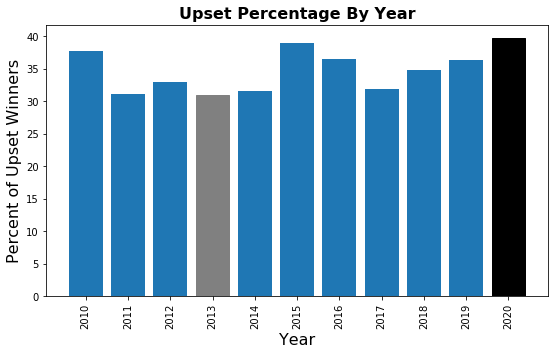

In [25]:
plt.figure(figsize=(9,5))
barlist = plt.bar(year_labels, year_upset_percent)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16)
plt.xticks(year_labels, rotation=90)
plt.title('Upset Percentage By Year', fontweight='bold', fontsize=16)
barlist[10].set_color('black')
barlist[3].set_color('grey')

Text(0.5, 1, 'Upset Percentage by Year')

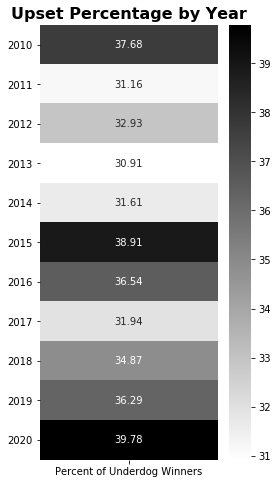

In [38]:
temp_df = pd.DataFrame({"Percent of Underdog Winners": year_upset_percent},
                      index=year_labels)

fig, ax = plt.subplots(figsize=(4,8))
sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='binary', ax=ax)
plt.yticks(rotation=0)
plt.title("Upset Percentage by Year", fontsize=16, fontweight='bold')


Underdogs win between 30.9% and 39.8%.  The best year for underdogs is 2020 so far.  The worst year was 2013.
***

#### How do upsets vary by weight class?

In [42]:
#weight_class_list = df['weight_class'].unique()
#We are manually going to enter the weight class list so we can enter it in order of lightest to heaviest.
weight_class_list = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 
                     'Middleweight', 'Light Heavyweight', 'Heavyweight', "Women's Strawweight", 
                    "Women's Flyweight", "Women's Bantamweight", "Women's Featherweight", "Catch Weight"]
wc_fight_counts = []
wc_upset_counts = []
wc_upset_percent = []

for wc in weight_class_list:
    temp_fights = df_no_even[df_no_even['weight_class']==wc]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['underdog']]
    wc_fight_counts.append(len(temp_fights))
    wc_upset_counts.append(len(temp_upsets))
    wc_upset_percent.append(len(temp_upsets)/len(temp_fights))

#print(weight_class_list)
#print()
#print(wc_fight_counts)
#print()
#print(wc_upset_counts)
#print()
wc_upset_percent = [x*100 for x in wc_upset_percent]    
print(wc_upset_percent)


[33.5, 33.415233415233416, 36.69527896995708, 31.36482939632546, 35.82295988934993, 36.74698795180723, 34.226190476190474, 33.980582524271846, 31.61290322580645, 39.473684210526315, 35.714285714285715, 28.57142857142857, 37.5]


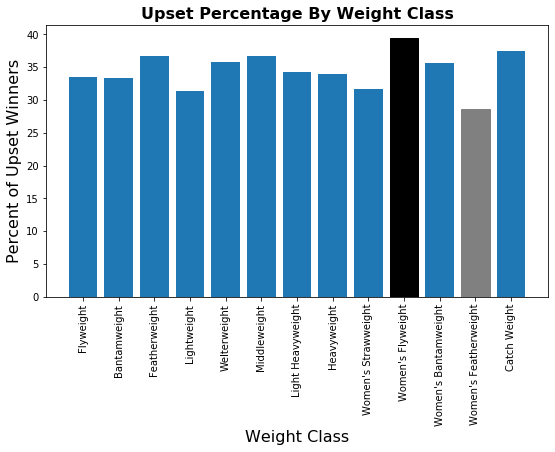

In [45]:
plt.figure(figsize=(9,5))
barlist = plt.bar(weight_class_list, wc_upset_percent)
plt.xlabel("Weight Class", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16)
plt.xticks(weight_class_list, rotation=90)
plt.title('Upset Percentage By Weight Class', fontweight='bold', fontsize=16)
barlist[9].set_color('black')
barlist[11].set_color('grey')

Text(0.5, 1, 'Upset Percentage by Weight Class')

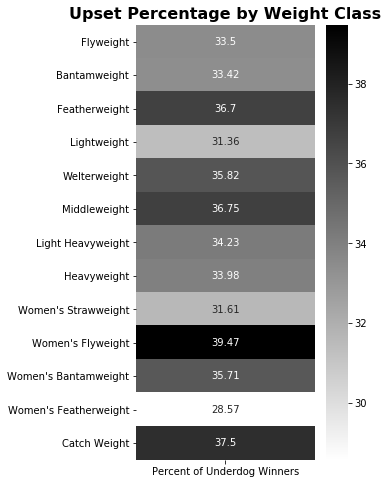

In [46]:
temp_df = pd.DataFrame({"Percent of Underdog Winners": wc_upset_percent},
                      index=weight_class_list)

fig, ax = plt.subplots(figsize=(4,8))
sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='binary', ax=ax)
plt.yticks(rotation=0)
plt.title("Upset Percentage by Weight Class", fontsize=16, fontweight='bold')


Upset Percentage varies from 28.6% for Women's Featherweight to 39.5% for Women's Flyweight.
***

#### How do Upsets vary by Gender?

In [30]:
gender_list = df['gender'].unique()
gender_fight_counts = []
gender_upset_counts = []
gender_upset_percent = []

for g in gender_list:
    temp_fights = df_no_even[df_no_even['gender']==g]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['underdog']]
    gender_fight_counts.append(len(temp_fights))
    gender_upset_counts.append(len(temp_upsets))
    gender_upset_percent.append(len(temp_upsets)/len(temp_fights))

#print(gender_list)
#print()
#print(gender_fight_counts)
#print()
#print(gender_upset_counts)
#print()
#gender_upset_percent = [x*100 for x in gender_upset_percent]    
#print(gender_upset_percent)

Text(0.5, 1.0, 'Upset Percentage By Gender')

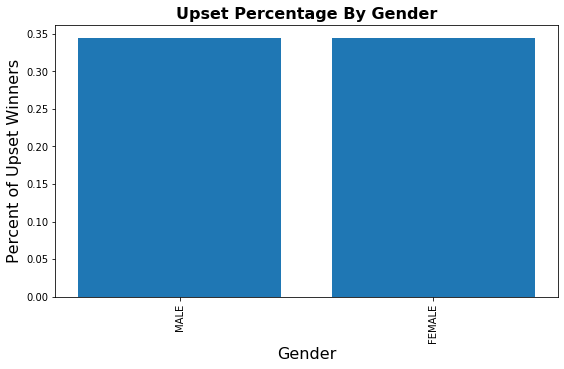

In [31]:
plt.figure(figsize=(9,5))
barlist = plt.bar(gender_list, gender_upset_percent)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16)
plt.xticks(gender_list, rotation=90)
plt.title('Upset Percentage By Gender', fontweight='bold', fontsize=16)

The upset percentage for male and females is almost identical.  Male underdogs win 34.46% of the time.  Female underdogs win 34.50% of the time.
***

#### Are upsets more common in title fights?

In [32]:
title_list = df['title_bout'].unique()
title_fight_counts = []
title_upset_counts = []
title_upset_percent = []

for t in title_list:
    temp_fights = df_no_even[df_no_even['title_bout']==t]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['underdog']]
    title_fight_counts.append(len(temp_fights))
    title_upset_counts.append(len(temp_upsets))
    title_upset_percent.append(len(temp_upsets)/len(temp_fights))
    
#print(title_list)
#print()
#print(title_fight_counts)
#print()
#print(title_upset_counts)
#print()
#title_upset_percent = [x*100 for x in title_upset_percent]    
print(title_upset_percent)    

[0.3458762886597938, 0.32211538461538464]


Text(0.5, 1.0, 'Upset Percentage By Title Bout')

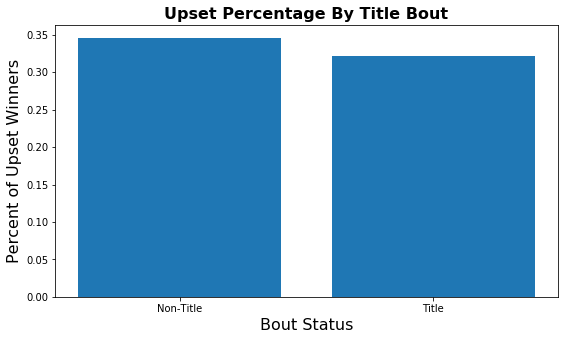

In [33]:
plt.figure(figsize=(9,5))
barlist = plt.bar(['Non-Title', 'Title'], title_upset_percent)
plt.xlabel("Bout Status", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16)
plt.xticks(['Non-Title', 'Title'])
plt.title('Upset Percentage By Title Bout', fontweight='bold', fontsize=16)

Upsets are slightly more likely in non-title bouts.  They occur 34.6% of the time compared to 32.2% of the time in title fights
***

#### Are upsets more likely in certain weight class title bouts?

Here we are starting to stray into an area where sample sizes may be too small for some weight classes.  I still think this is worth exploring though to see if any anomalies stand out.

In [47]:
df_title = df_no_even[df_no_even['title_bout']==True]
weight_class_list = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 
                     'Middleweight', 'Light Heavyweight', 'Heavyweight', "Women's Strawweight", 
                    "Women's Flyweight", "Women's Bantamweight", "Women's Featherweight"]

wc_fight_counts = []
wc_upset_counts = []
wc_upset_percent = []

for wc in weight_class_list:
    temp_fights = df_title[df_title['weight_class']==wc]
    temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['underdog']]
    wc_fight_counts.append(len(temp_fights))
    wc_upset_counts.append(len(temp_upsets))
    wc_upset_percent.append(len(temp_upsets)/len(temp_fights))

print(weight_class_list)
print()
print(wc_fight_counts)
print()
print(wc_upset_counts)
print()
wc_upset_percent = [x*100 for x in wc_upset_percent]    
print(wc_upset_percent)


['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight', "Women's Strawweight", "Women's Flyweight", "Women's Bantamweight", "Women's Featherweight"]

[15, 19, 20, 26, 27, 24, 21, 19, 11, 5, 15, 6]

[4, 8, 5, 11, 10, 8, 3, 9, 3, 0, 4, 2]

[26.666666666666668, 42.10526315789473, 25.0, 42.30769230769231, 37.03703703703704, 33.33333333333333, 14.285714285714285, 47.368421052631575, 27.27272727272727, 0.0, 26.666666666666668, 33.33333333333333]


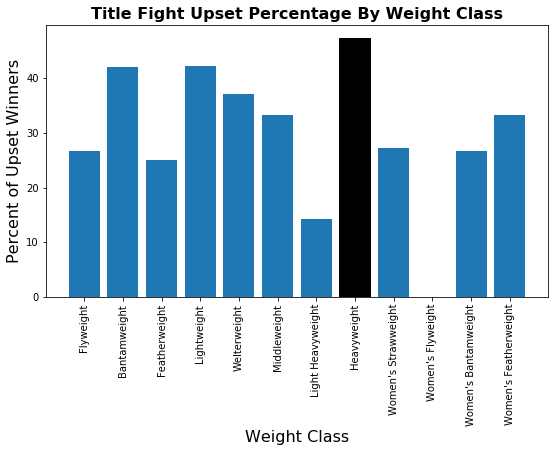

In [48]:
plt.figure(figsize=(9,5))
barlist = plt.bar(weight_class_list, wc_upset_percent)
plt.xlabel("Weight Class", fontsize=16)
plt.ylabel("Percent of Upset Winners", fontsize=16)
plt.xticks(weight_class_list, rotation=90)
plt.title('Title Fight Upset Percentage By Weight Class', fontweight='bold', fontsize=16)
barlist[7].set_color('black')

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

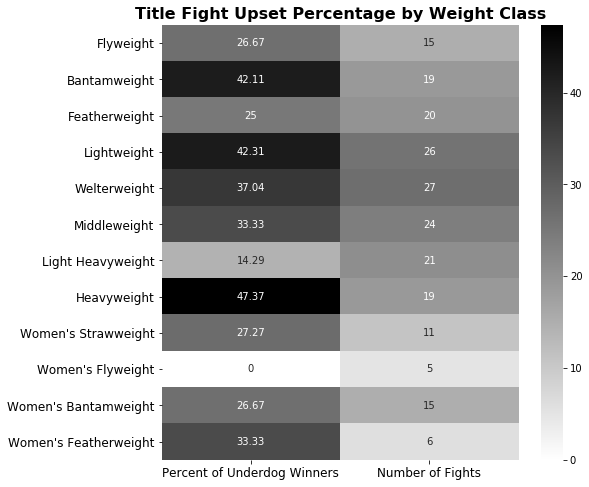

In [49]:
temp_df = pd.DataFrame({"Percent of Underdog Winners": wc_upset_percent, 
                        "Number of Fights": wc_fight_counts},
                      index=weight_class_list)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(temp_df, annot=True, fmt=".4g", cmap='binary', ax=ax)
plt.yticks(rotation=0, fontsize=12)
plt.title("Title Fight Upset Percentage by Weight Class", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)

In the five title fights in UFC Women's Flyweight history there has never been an upset.  Out of 19 title fights in heavyweight history 47.37% of them have been won by the underdog.
***

### Who has the most upsets since 2010?

In [73]:
red_fighter_list = df_no_even['R_fighter'].unique()
blue_fighter_list = df_no_even['B_fighter'].unique()
fighter_list = list(set(red_fighter_list) | set(blue_fighter_list))
upset_list = []

for f in fighter_list:
    temp_fights = df_no_even[(df_no_even['R_fighter']==f) | (df_no_even["B_fighter"]==f)]

    #Filter out fights where the fighter is not the winner.
    temp_fights = temp_fights[((temp_fights['R_fighter']==f) & (temp_fights['Winner']=='Red')) |
                             ((temp_fights['B_fighter']==f) & (temp_fights['Winner']=='Blue'))]
    
    
    #Filter out the fights where our hero is not the underdog.
    temp_fights = temp_fights[((temp_fights['R_fighter']==f) & (temp_fights['underdog']=='Red')) |
                             ((temp_fights['B_fighter']==f) & (temp_fights['underdog']=='Blue'))]
    
    
    upset_list.append(len(temp_fights)) 
    
    #print(temp_upset_count)
    #print(temp_fights)
    #print(f"{f}: {len(temp_fights)}")
    #temp_upsets = temp_fights[temp_fights['Winner'] == temp_fights['underdog']]
    #wc_fight_counts.append(len(temp_fights))
    #wc_upset_counts.append(len(temp_upsets))
    #wc_upset_percent.append(len(temp_upsets)/len(temp_fights))

#Zip the two lists into a dataframe
upset_tuples = list(zip(fighter_list, upset_list))
upset_df = pd.DataFrame(upset_tuples, columns=['fighter', 'upset_count'])
upset_df = upset_df.sort_values(by=['upset_count'], ascending=False)
display(upset_df.head())

,fighter,upset_count
281,Darren Elkins,9
198,Rani Yahya,8
1022,Diego Sanchez,8
83,Neil Magny,7
1091,Jan Blachowicz,7


In [ ]:
#Combine upset_lis